In [1]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [2]:
model = XGBRegressor()
model.load_model("../model/saved_models/xgboost_model.json")

In [4]:
df = pd.read_csv("../data/train.csv")
features = ["Age", "Duration", "Heart_Rate", "Body_Temp"]
target = "Calories"

X = df[features].values
y = df[target].values

# 2. Optionally scale features (tree models don't require it, but can help)
scaler = joblib.load("../model/saved_models/xgb_scaler.pkl")
X = scaler.fit_transform(X)

# 3. Train/val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
preds = model.predict(X_val)

In [15]:
def plot_feature_importance(model, features):
    plt.figure(figsize=(10, 6))
    plt.barh(features, model.feature_importances_)
    plt.xlabel("Feature Importance")
    plt.title("XGBoost Feature Importance")
    plt.show()

def plot_residuals(y_val, preds):
    plt.figure(figsize=(10, 6))
    residuals = y_val - preds
    plt.scatter(preds, residuals, alpha=0.3)
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel("Predicted Calories")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

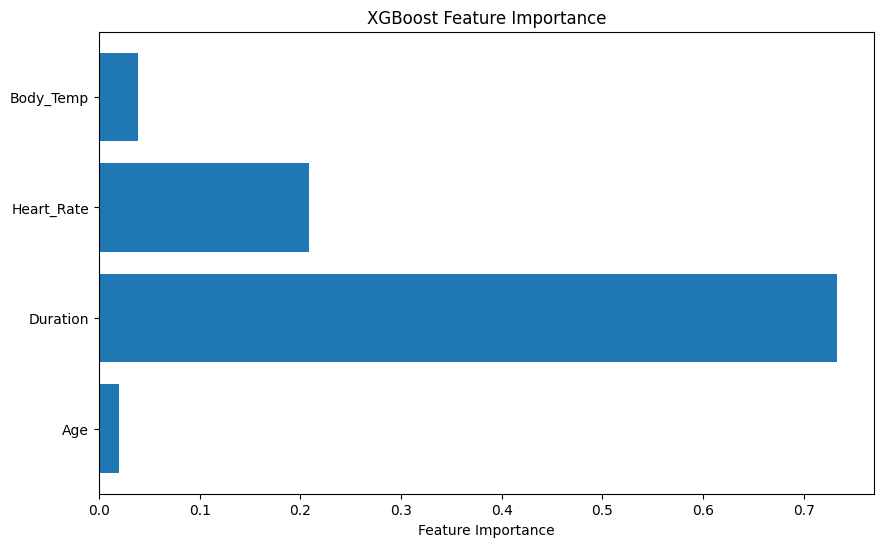

In [17]:
plot_feature_importance(model, features)

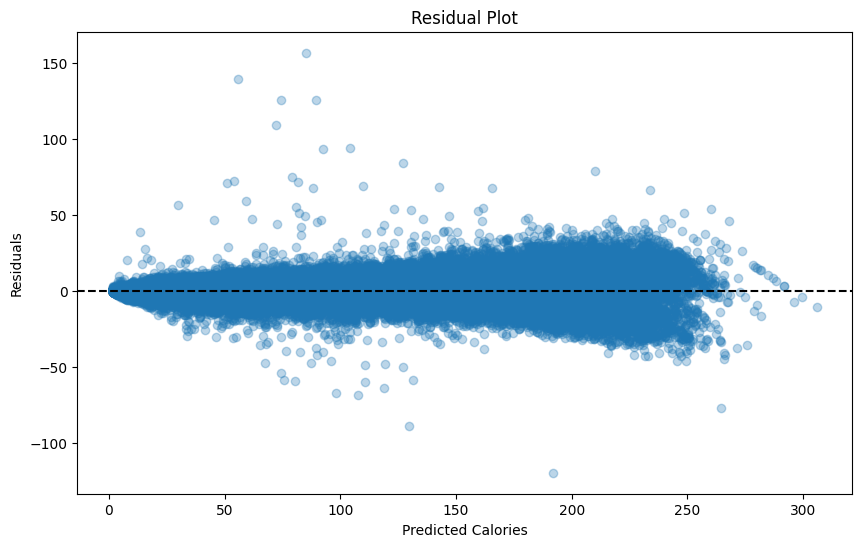

In [16]:
plot_residuals(y_val, preds)

## Subsets

In [ ]:
preds = model.predict(scaler.transform(X_val))

## Submission

In [5]:
test_data = pd.read_csv("../data/test.csv")
test_features = test_data[features].values
test_features = scaler.transform(test_features)
predictions = model.predict(test_features)
submission = pd.DataFrame({
    "id": test_data["id"],
    "Calories": predictions
})
submission.to_csv("../data/submissions/xgb_v2_submission.csv", index=False)